In [6]:
import tensorflow as tf
import IPython
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from src.dataset import dataset_raw, preprocess_data
from src.model import get_seq_model, get_conv_model
from src.plots import plot_audio, plot_history

In [7]:
data, labels, label_names = dataset_raw("./dataset/queenless")
print(f"Got {len(data)} items. Classes: {label_names}")

Got 529 items. Classes: ['queen', 'no_queen']


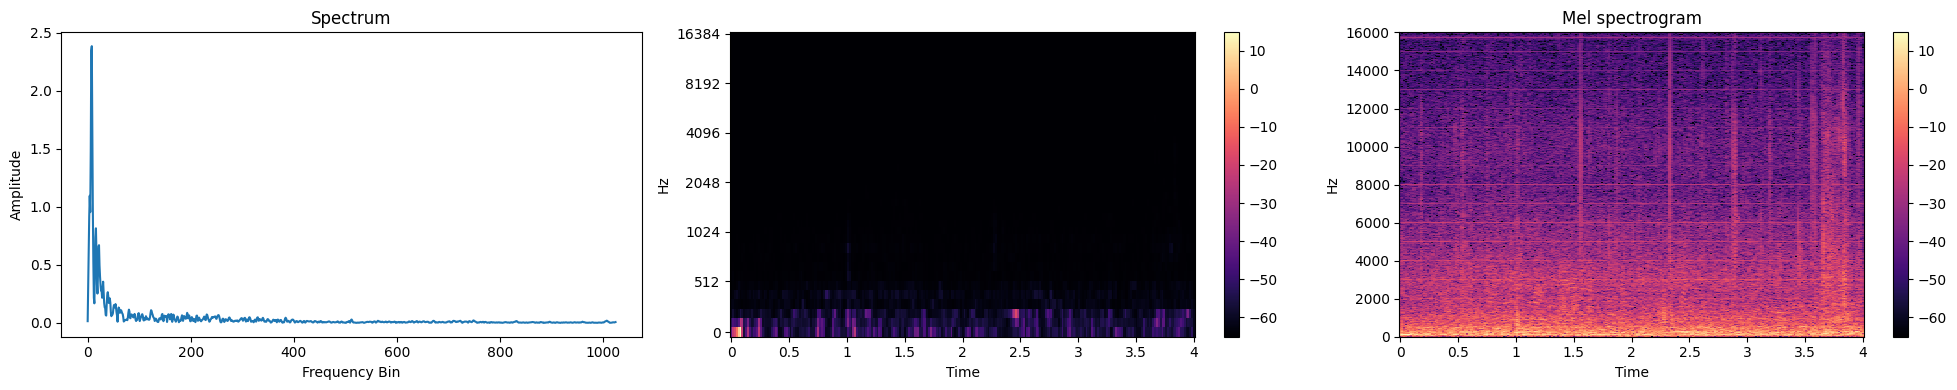

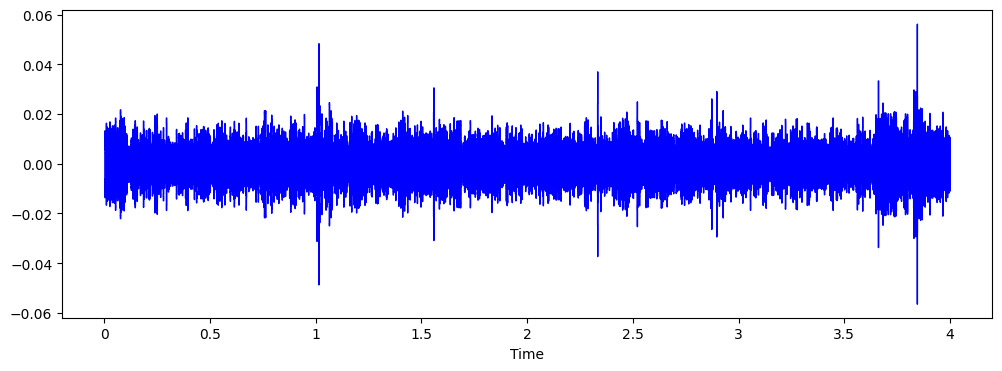

In [8]:
example = data[0]
example_audio = example[0]
example_sr = example[1]
display(IPython.display.Audio(example_audio, rate = example_sr))
plot_audio(example_audio, example_sr)

In [9]:
data = preprocess_data(data)
# Split data into training and testing sets
# data, labels = load_and_preprocess_data(data_dir, classes)
labels = to_categorical(labels, num_classes=len(label_names))  # Convert labels to one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
input_shape = X_train[0].shape

2024-02-28 20:51:08.528555: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-02-28 20:51:08.528582: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-28 20:51:08.528591: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-28 20:51:08.528647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-28 20:51:08.528689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Sequential model

In [10]:
X_train.shape

(423, 128, 128, 1)

In [33]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

model_seq = get_seq_model(
    input_shape, 
    len(label_names), 
    train_ds
)
model_seq.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [34]:

history = model_seq.fit(
    X_train,
    y_train,
    epochs=100, 
    validation_data=(X_test, y_test) 
#    callbacks=[tensorboard_callback]
)

Epoch 1/100


 1/14 [=>............................] - ETA: 6s - loss: 2.9174 - accuracy: 0.3438

2024-02-26 23:08:28.243432: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


14/14 [==============================] - 1s 37ms/step - loss: 2.5011 - accuracy: 0.4846 - val_loss: 0.7222 - val_accuracy: 0.5472
Epoch 2/100
14/14 [==============================] - 0s 16ms/step - loss: 0.6805 - accuracy: 0.6123 - val_loss: 0.6950 - val_accuracy: 0.5472
Epoch 3/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6753 - accuracy: 0.5816 - val_loss: 0.6930 - val_accuracy: 0.5472
Epoch 4/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6661 - accuracy: 0.6123 - val_loss: 0.6945 - val_accuracy: 0.5472
Epoch 5/100
14/14 [==============================] - 0s 15ms/step - loss: 0.6633 - accuracy: 0.6147 - val_loss: 0.6957 - val_accuracy: 0.5472
Epoch 6/100
14/14 [==============================] - 0s 16ms/step - loss: 0.6609 - accuracy: 0.6147 - val_loss: 0.6907 - val_accuracy: 0.5472
Epoch 7/100
14/14 [==============================] - 0s 16ms/step - loss: 0.6518 - accuracy: 0.6241 - val_loss: 0.6765 - val_accuracy: 0.5566
Epoch 8/100
14/14 

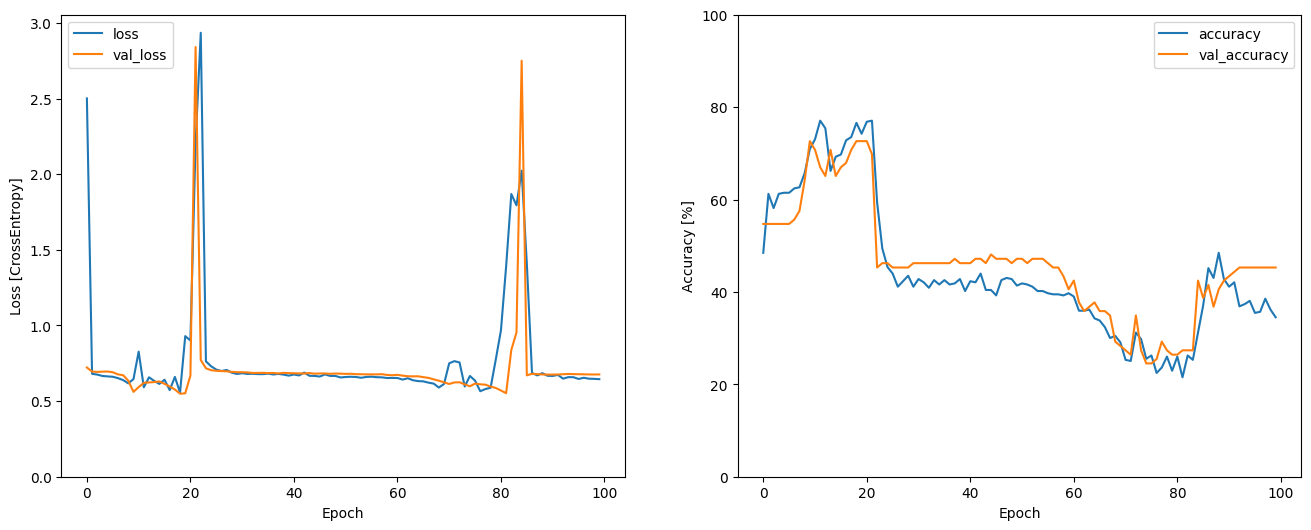

In [35]:
plot_history(history)

# Convolutional

In [11]:
model_conv = get_conv_model(input_shape, len(label_names))
model_conv.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
history = model_conv.fit(
    X_train,
    y_train,
    epochs=100, 
    validation_data=(X_test, y_test) 
#    callbacks=[tensorboard_callback]
)

Epoch 1/100


2024-02-28 20:51:30.008462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-28 20:51:30.037619: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


14/14 [==============================] - 1s 45ms/step - loss: 0.8259 - accuracy: 0.5650 - val_loss: 0.6111 - val_accuracy: 0.6604
Epoch 2/100
14/14 [==============================] - 0s 25ms/step - loss: 0.4897 - accuracy: 0.7447 - val_loss: 0.3752 - val_accuracy: 0.8585
Epoch 3/100
14/14 [==============================] - 0s 24ms/step - loss: 0.3892 - accuracy: 0.8392 - val_loss: 0.3381 - val_accuracy: 0.8774
Epoch 4/100
14/14 [==============================] - 0s 25ms/step - loss: 0.3658 - accuracy: 0.8392 - val_loss: 0.3423 - val_accuracy: 0.8774
Epoch 5/100
14/14 [==============================] - 0s 25ms/step - loss: 0.4162 - accuracy: 0.8298 - val_loss: 1.3649 - val_accuracy: 0.6604
Epoch 6/100
14/14 [==============================] - 0s 25ms/step - loss: 1.3071 - accuracy: 0.6950 - val_loss: 2.7225 - val_accuracy: 0.6415
Epoch 7/100
14/14 [==============================] - 0s 24ms/step - loss: 1.2062 - accuracy: 0.6690 - val_loss: 1.8182 - val_accuracy: 0.8302
Epoch 8/100
14/14 

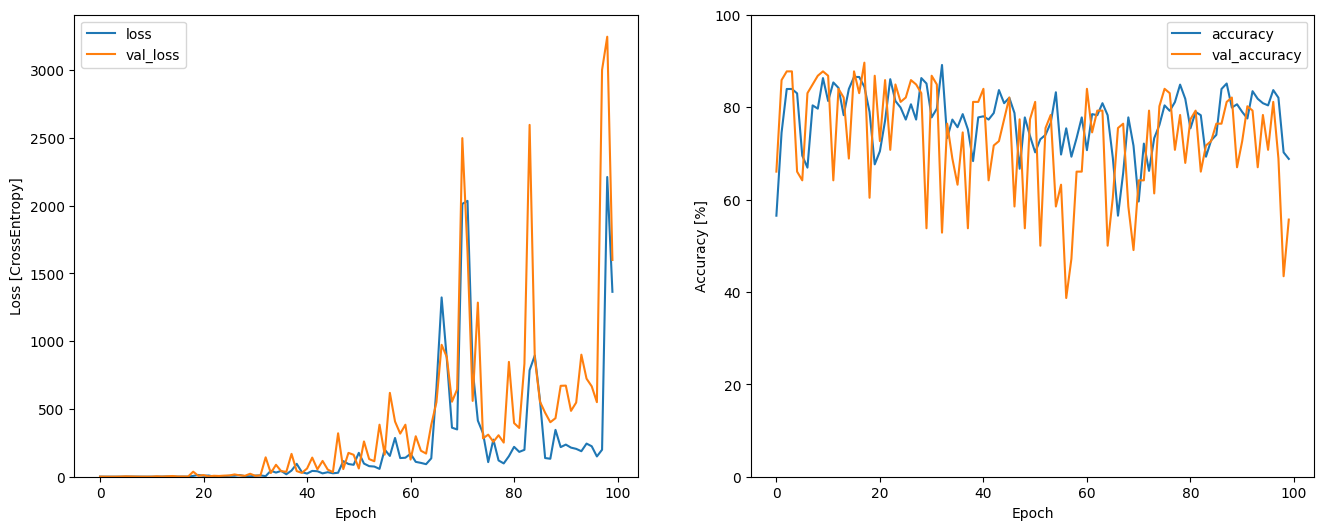

In [13]:
plot_history(history)